In [1]:
!python -m pip install --upgrade pip

In [2]:
!pip install nltk

In [92]:
!pip install wordcloud

   -------------------------------------- 153.3/153.3 kB 481.7 kB/s eta 0:00:00


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/a1_RestaurantReviews_HistoricDump.tsv", sep='\t')

In [6]:
reviews_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
reviews_data.shape

(900, 2)

In [8]:
reviews_data['no_contractions'] = reviews_data['Review'].apply(lambda x: [contractions.fix(word) for word in x.split()])
reviews_data.head(7)

,Review,Liked,no_contractions
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]"
1,Crust is not good.,0,"[Crust, is, not, good.]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an..."
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,..."
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did not, taste, THAT, fresh.)]"


In [9]:
reviews_data['reviews_no_contractions'] = [' '.join(l) for l in reviews_data['no_contractions']]
reviews_data.head(7)

,Review,Liked,no_contractions,reviews_no_contractions
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,0,"[Now, I, am, getting, angry, and, I, want, my,...",Now I am getting angry and I want my damn pho.
6,Honeslty it didn't taste THAT fresh.),0,"[Honeslty, it, did not, taste, THAT, fresh.)]",Honeslty it did not taste THAT fresh.)


In [10]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_no_contractions'].apply(word_tokenize)
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an..."


In [11]:
reviews_data['reviews_lower'] = reviews_data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an..."


In [12]:
punctuations = string.punctuation
reviews_data['reviews_no_punctuation'] = reviews_data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]","[crust, is, not, good]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an..."


In [13]:
reviews_data['reviews_cleaned'] = [' '.join(l) for l in reviews_data['reviews_no_punctuation']]
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[Wow, ..., Loved, this, place, .]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]",wow ... loved this place
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[Crust, is, not, good, .]","[crust, is, not, good, .]","[crust, is, not, good]",crust is not good
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[Not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]",not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[Stopped, by, during, the, late, May, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...",stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[The, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...",the selection on the menu was great and so wer...


In [14]:
reviews_data[['Review','Liked','reviews_cleaned']].to_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv',index = False)

### Dealing With Stop Words
on, now, was, dst. Digunakan agar mereview secara relevan dan harus ditonjolkan, apakah kebanyakan review menyatakan kata sifat yang mempengaruhi data tersebut. misal di restoran, ,maaka kata yang sering muncuk seperti makanannya enak, baik , dll. Agar kita mendapat insight yang lebih relevan

In [15]:
Reviews_data = pd.read_csv('C:/Users/hp/Downloads/cleaned_reviews_data.csv')

In [16]:
Reviews_data.head()

,Review,Liked,reviews_cleaned
0,Wow... Loved this place.,1,wow ... loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [17]:
reviews_data.shape

(900, 8)

In [18]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned'].apply(word_tokenize)

In [19]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [20]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
           
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [21]:
reviews = reviews_data['reviews_tokenized']
reviews_words = combine_words(reviews)
reviews_words[:10]
['wow', '...', 'loved', 'this', 'place', 'crust', 'is', 'not', 'good', 'not']

['wow', '...', 'loved', 'this', 'place', 'crust', 'is', 'not', 'good', 'not']

In [22]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
11,the,517
10,and,360
36,i,310
13,was,267
66,a,208


<AxesSubplot:xlabel='words', ylabel='word_count'>

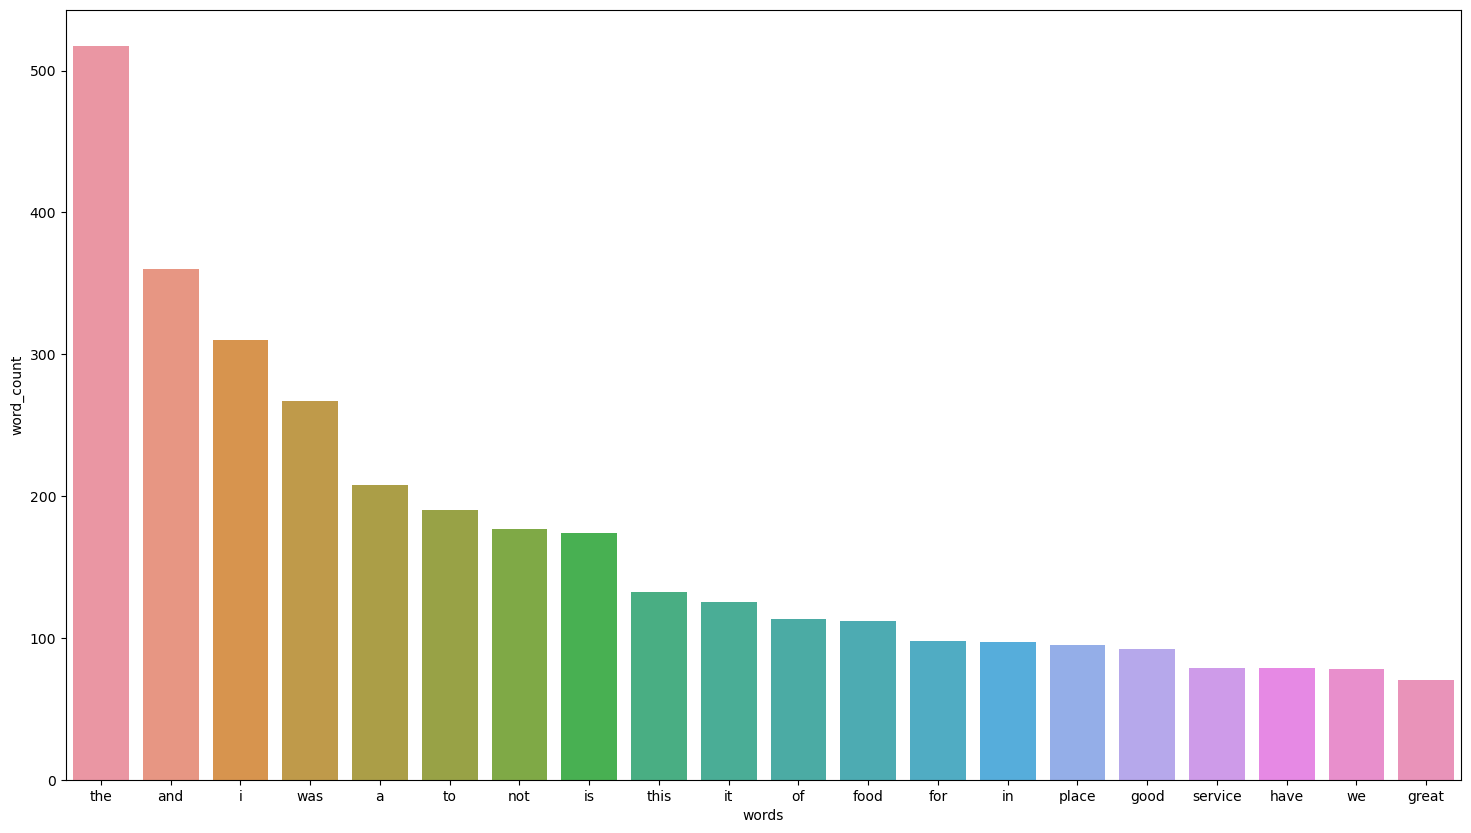

In [23]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [24]:
stop_words = set(stopwords.words('english'))
reviews_data['reviews_no_stopwords'] = reviews_data['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[wow, ..., loved, this, place]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]",wow ... loved this place,"[wow, ..., loved, place]"
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[crust, is, not, good]","[crust, is, not, good, .]","[crust, is, not, good]",crust is not good,"[crust, good]"
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]",not tasty and the texture was just nasty,"[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...",stopped by during the late may bank holiday of...,"[stopped, late, may, bank, holiday, rick, stev..."
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...",the selection on the menu was great and so wer...,"[selection, menu, great, prices]"


In [25]:
reviews_data['reviews_cleaned_stopwords'] = [' '.join(l) for l in reviews_data['reviews_no_stopwords']]
reviews_data.head()

,Review,Liked,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned,reviews_no_stopwords,reviews_cleaned_stopwords
0,Wow... Loved this place.,1,"[Wow..., Loved, this, place.]",Wow... Loved this place.,"[wow, ..., loved, this, place]","[wow, ..., loved, this, place, .]","[wow, ..., loved, this, place]",wow ... loved this place,"[wow, ..., loved, place]",wow ... loved place
1,Crust is not good.,0,"[Crust, is, not, good.]",Crust is not good.,"[crust, is, not, good]","[crust, is, not, good, .]","[crust, is, not, good]",crust is not good,"[crust, good]",crust good
2,Not tasty and the texture was just nasty.,0,"[Not, tasty, and, the, texture, was, just, nas...",Not tasty and the texture was just nasty.,"[not, tasty, and, the, texture, was, just, nasty]","[not, tasty, and, the, texture, was, just, nas...","[not, tasty, and, the, texture, was, just, nasty]",not tasty and the texture was just nasty,"[tasty, texture, nasty]",tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,"[Stopped, by, during, the, late, May, bank, ho...",Stopped by during the late May bank holiday of...,"[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...","[stopped, by, during, the, late, may, bank, ho...",stopped by during the late may bank holiday of...,"[stopped, late, may, bank, holiday, rick, stev...",stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,"[The, selection, on, the, menu, was, great, an...",The selection on the menu was great and so wer...,"[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...","[the, selection, on, the, menu, was, great, an...",the selection on the menu was great and so wer...,"[selection, menu, great, prices]",selection menu great prices


In [26]:
reviews_no_stopwords = reviews_data['reviews_no_stopwords']
reviews_words = combine_words(reviews_no_stopwords)
reviews_words[:10]
['wow',
 '...',
 'loved',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped']

['wow',
 '...',
 'loved',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped']

In [27]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
81,food,112
3,place,95
5,good,92
41,service,79
19,great,70


<AxesSubplot:xlabel='words', ylabel='word_count'>

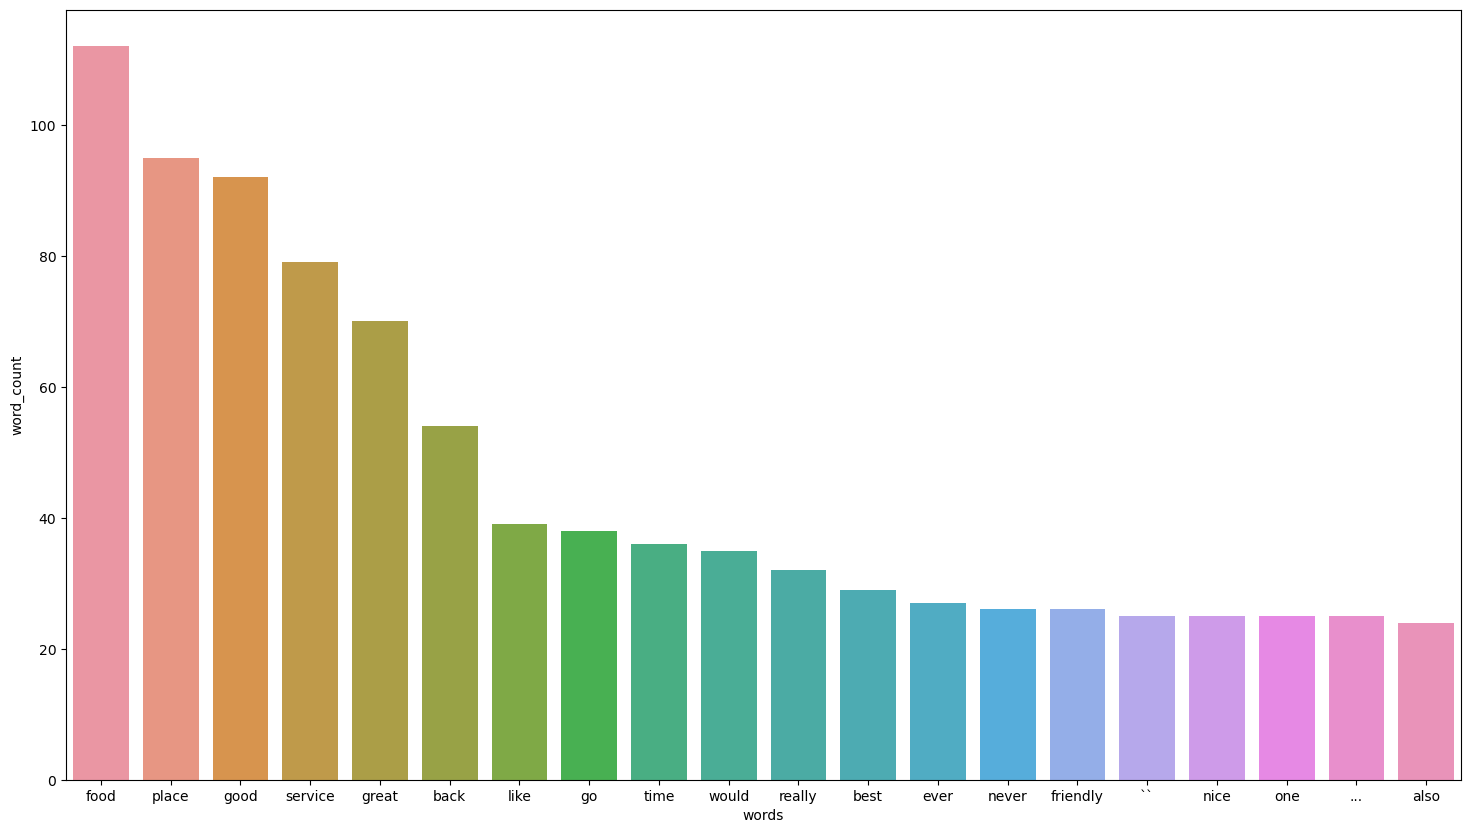

In [28]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [31]:
reviews_data[['Review','Liked',"reviews_cleaned",'reviews_cleaned_stopwords']].to_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv",index = False)

### Analyzing Part Of Speech 
Nouns, verbs, adjective, adverb

In [32]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

In [33]:
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place
1,Crust is not good.,0,crust is not good,crust good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices


In [34]:
reviews_data.shape

(900, 4)

In [36]:
reviews_data = reviews_data.dropna()

In [38]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

In [39]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_pos_tags
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[(wow, NN), (..., :), (loved, VBD), (place, NN)]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[(crust, NN), (good, NN)]"
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[(tasty, JJ), (texture, NN), (nasty, NN)]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[(stopped, VBN), (late, JJ), (may, MD), (bank,..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[(selection, NN), (menu, VBZ), (great, JJ), (p..."


In [42]:
reviews_data['reviews_adjectives'] = reviews_data['reviews_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

In [43]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [44]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [45]:
reviews = reviews_data['reviews_adjectives']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['tasty',
 'late',
 'rick',
 'great',
 'angry',
 'fresh',
 'great',
 'great',
 'tried',
 'pretty']

In [46]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
17,good,87
3,great,70
54,delicious,23
44,nice,21
38,bad,15


<AxesSubplot:xlabel='words', ylabel='word_count'>

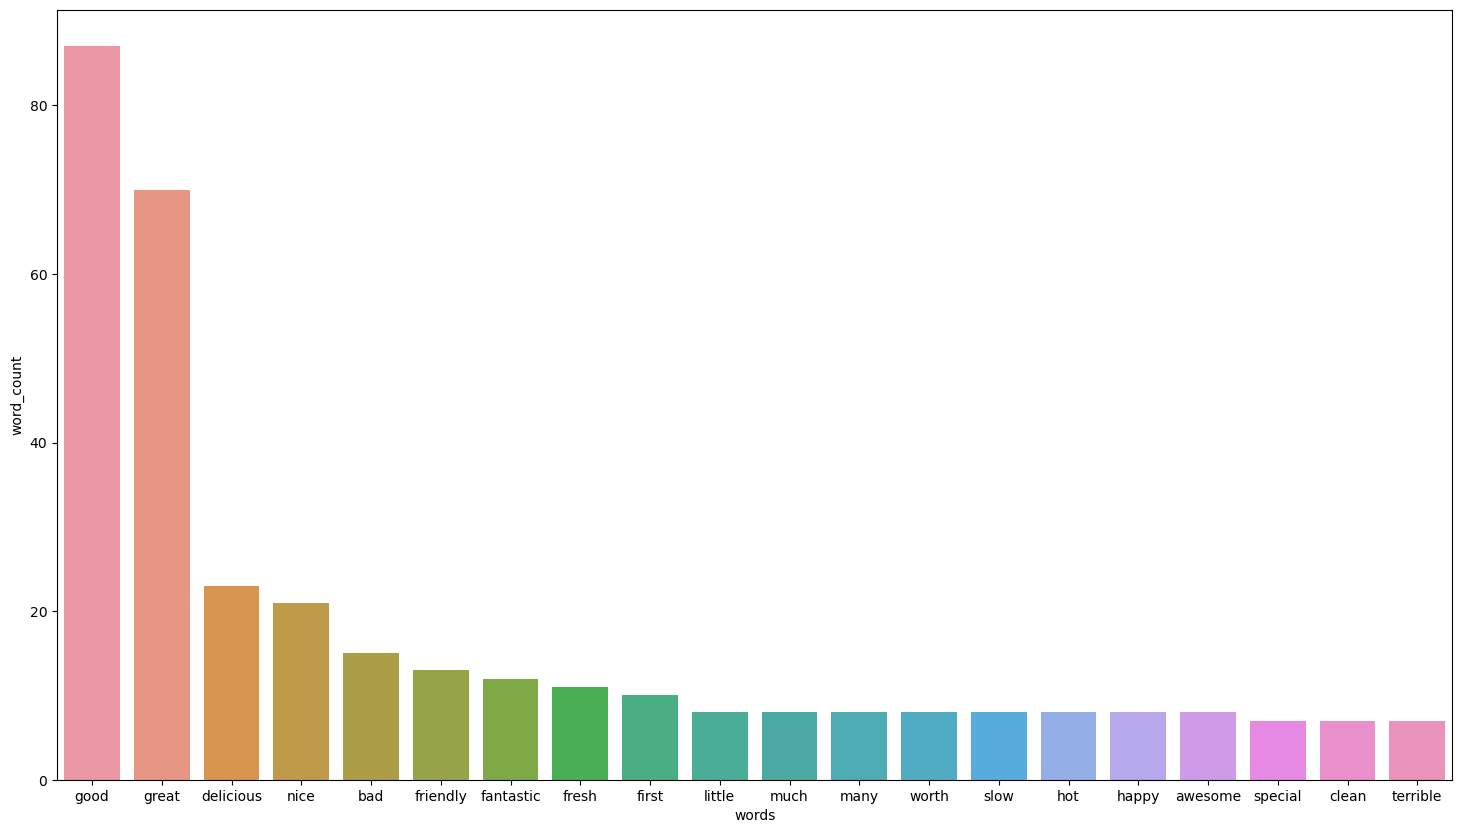

In [47]:
plt.figure(figsize= (18,10))

sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

###  Performing stemming and lemmatization

In [48]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

In [49]:
reviews_data.dtypes

Review                       object
Liked                         int64
reviews_cleaned              object
reviews_cleaned_stopwords    object
dtype: object

In [50]:
reviews_data = reviews_data.dropna()

In [51]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

In [52]:
stemmer = nltk.PorterStemmer()
reviews_data['reviews_stemmed_data'] = reviews_data['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow, ..., love, place]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]"


In [53]:
reviews_data['reviews_pos_tags'] = reviews_data['reviews_tokenized'].apply(nltk.tag.pos_tag)
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow, ..., love, place]","[(wow, NN), (..., :), (loved, VBD), (place, NN)]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[crust, good]","[(crust, NN), (good, NN)]"
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]","[(tasty, JJ), (texture, NN), (nasty, NN)]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ...","[(stopped, VBN), (late, JJ), (may, MD), (bank,..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]","[(selection, NN), (menu, VBZ), (great, JJ), (p..."


In [58]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
reviews_data['reviews_wordnet_pos_tags'] = reviews_data['reviews_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow, ..., love, place]","[(wow, NN), (..., :), (loved, VBD), (place, NN)]","[(wow, n), (..., n), (loved, v), (place, n)]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[crust, good]","[(crust, NN), (good, NN)]","[(crust, n), (good, n)]"
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]","[(tasty, JJ), (texture, NN), (nasty, NN)]","[(tasty, a), (texture, n), (nasty, n)]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ...","[(stopped, VBN), (late, JJ), (may, MD), (bank,...","[(stopped, v), (late, a), (may, n), (bank, n),..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]","[(selection, NN), (menu, VBZ), (great, JJ), (p...","[(selection, n), (menu, v), (great, a), (price..."


In [59]:
lemmatizer = WordNetLemmatizer()
reviews_data['reviews_lemmatized'] = reviews_data['reviews_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow, ..., love, place]","[(wow, NN), (..., :), (loved, VBD), (place, NN)]","[(wow, n), (..., n), (loved, v), (place, n)]","[wow, ..., love, place]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[crust, good]","[(crust, NN), (good, NN)]","[(crust, n), (good, n)]","[crust, good]"
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]","[(tasty, JJ), (texture, NN), (nasty, NN)]","[(tasty, a), (texture, n), (nasty, n)]","[tasty, texture, nasty]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ...","[(stopped, VBN), (late, JJ), (may, MD), (bank,...","[(stopped, v), (late, a), (may, n), (bank, n),...","[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]","[(selection, NN), (menu, VBZ), (great, JJ), (p...","[(selection, n), (menu, v), (great, a), (price...","[selection, menu, great, price]"


In [60]:
reviews_data['reviews_cleaned_lemmatized'] = [' '.join(l) for l in reviews_data['reviews_lemmatized']]
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow, ..., love, place]","[(wow, NN), (..., :), (loved, VBD), (place, NN)]","[(wow, n), (..., n), (loved, v), (place, n)]","[wow, ..., love, place]",wow ... love place
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]","[crust, good]","[(crust, NN), (good, NN)]","[(crust, n), (good, n)]","[crust, good]",crust good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]","[(tasty, JJ), (texture, NN), (nasty, NN)]","[(tasty, a), (texture, n), (nasty, n)]","[tasty, texture, nasty]",tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ...","[(stopped, VBN), (late, JJ), (may, MD), (bank,...","[(stopped, v), (late, a), (may, n), (bank, n),...","[stop, late, may, bank, holiday, rick, steve, ...",stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]","[(selection, NN), (menu, VBZ), (great, JJ), (p...","[(selection, n), (menu, v), (great, a), (price...","[selection, menu, great, price]",selection menu great price


In [61]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [62]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [63]:
reviews = reviews_data['reviews_lemmatized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow',
 '...',
 'love',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stop']

In [64]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
81,food,113
3,place,99
5,good,97
41,service,79
19,great,71


<AxesSubplot:xlabel='words', ylabel='word_count'>

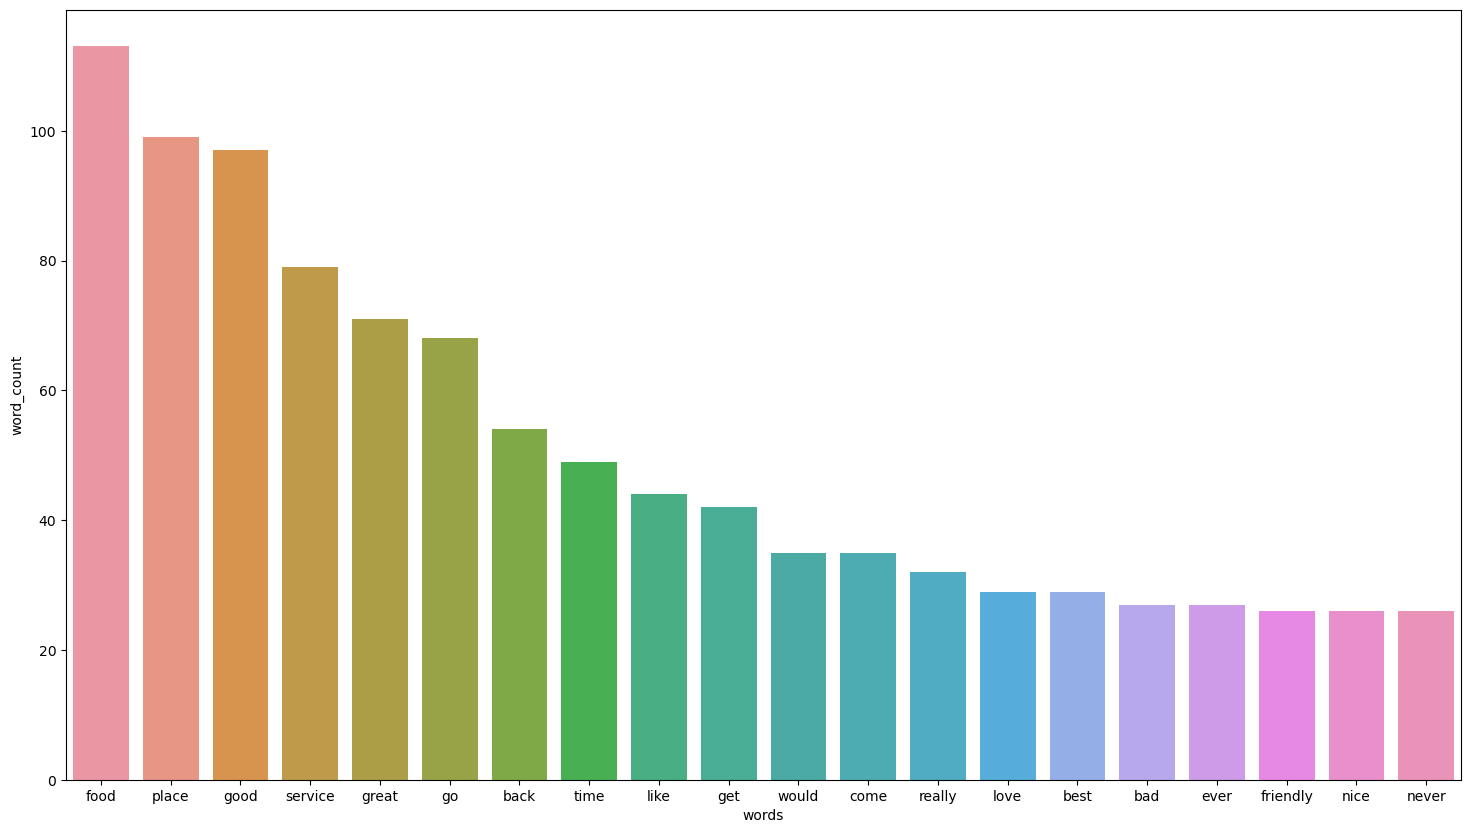

In [65]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [67]:
reviews_data[['Review','Liked','reviews_cleaned_lemmatized',"reviews_cleaned"]].to_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv",index = False)

### Analysing Ngrams

In [69]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_no_stopwords_data.csv")

In [71]:
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place
1,Crust is not good.,0,crust is not good,crust good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices


In [72]:
reviews_data.shape

(900, 4)

In [73]:
reviews_data = reviews_data.dropna()

In [74]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_stopwords'].apply(word_tokenize)

In [75]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

In [76]:
reviews_data['reviews_ngrams'] = reviews_data['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
reviews_data.head()

,Review,Liked,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,Wow... Loved this place.,1,wow ... loved this place,wow ... loved place,"[wow, ..., loved, place]","[wow ..., ... loved, loved place]"
1,Crust is not good.,0,crust is not good,crust good,"[crust, good]",[crust good]
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty,tasty texture nasty,"[tasty, texture, nasty]","[tasty texture, texture nasty]"
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stopped late, late may, may bank, bank holida..."
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[selection menu, menu great, great prices]"


In [77]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [78]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [79]:
reviews = reviews_data['reviews_ngrams']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow ...',
 '... loved',
 'loved place',
 'crust good',
 'tasty texture',
 'texture nasty',
 'stopped late',
 'late may',
 'may bank',
 'bank holiday']

In [81]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
36,go back,15
366,good food,8
244,great food,8
1475,food good,7
326,really good,6


<AxesSubplot:xlabel='words', ylabel='word_count'>

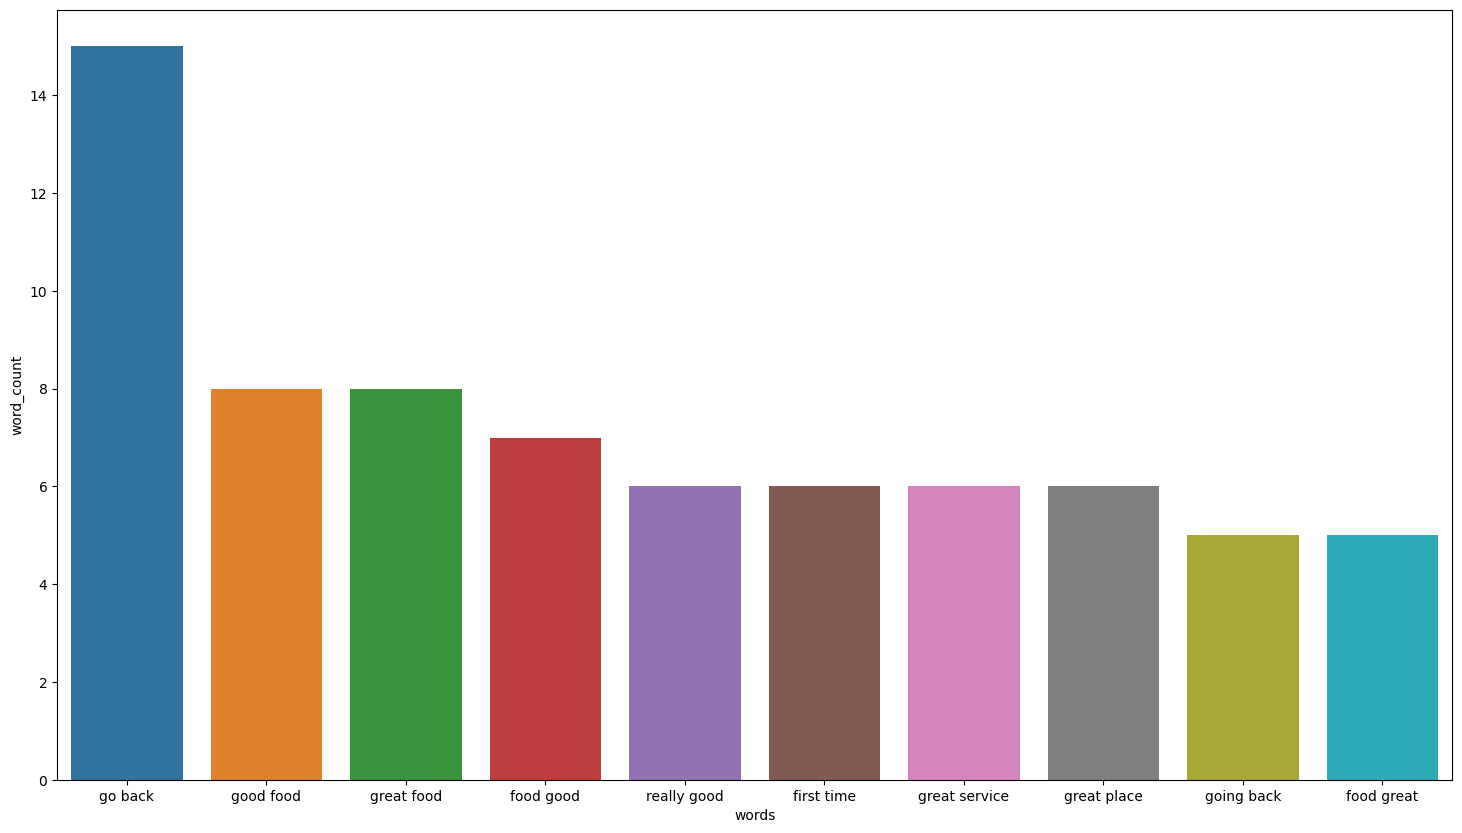

In [82]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Creating Word Clouds

In [83]:
reviews_data = pd.read_csv("C:/Users/hp/Downloads/cleaned_reviews_lemmatized_data.csv")

In [84]:
reviews_data.head()

,Review,Liked,reviews_cleaned_lemmatized,reviews_cleaned
0,Wow... Loved this place.,1,wow ... love place,wow ... loved this place
1,Crust is not good.,0,crust good,crust is not good
2,Not tasty and the texture was just nasty.,0,tasty texture nasty,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,selection menu great price,the selection on the menu was great and so wer...


In [85]:
reviews_data.shape

(899, 4)

In [86]:
reviews_data = reviews_data.dropna()

In [87]:
reviews_data['reviews_tokenized'] = reviews_data['reviews_cleaned_lemmatized'].apply(word_tokenize)

In [88]:
def combine_words(word_list):    
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [89]:
reviews = reviews_data['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['wow',
 '...',
 'love',
 'place',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stop']

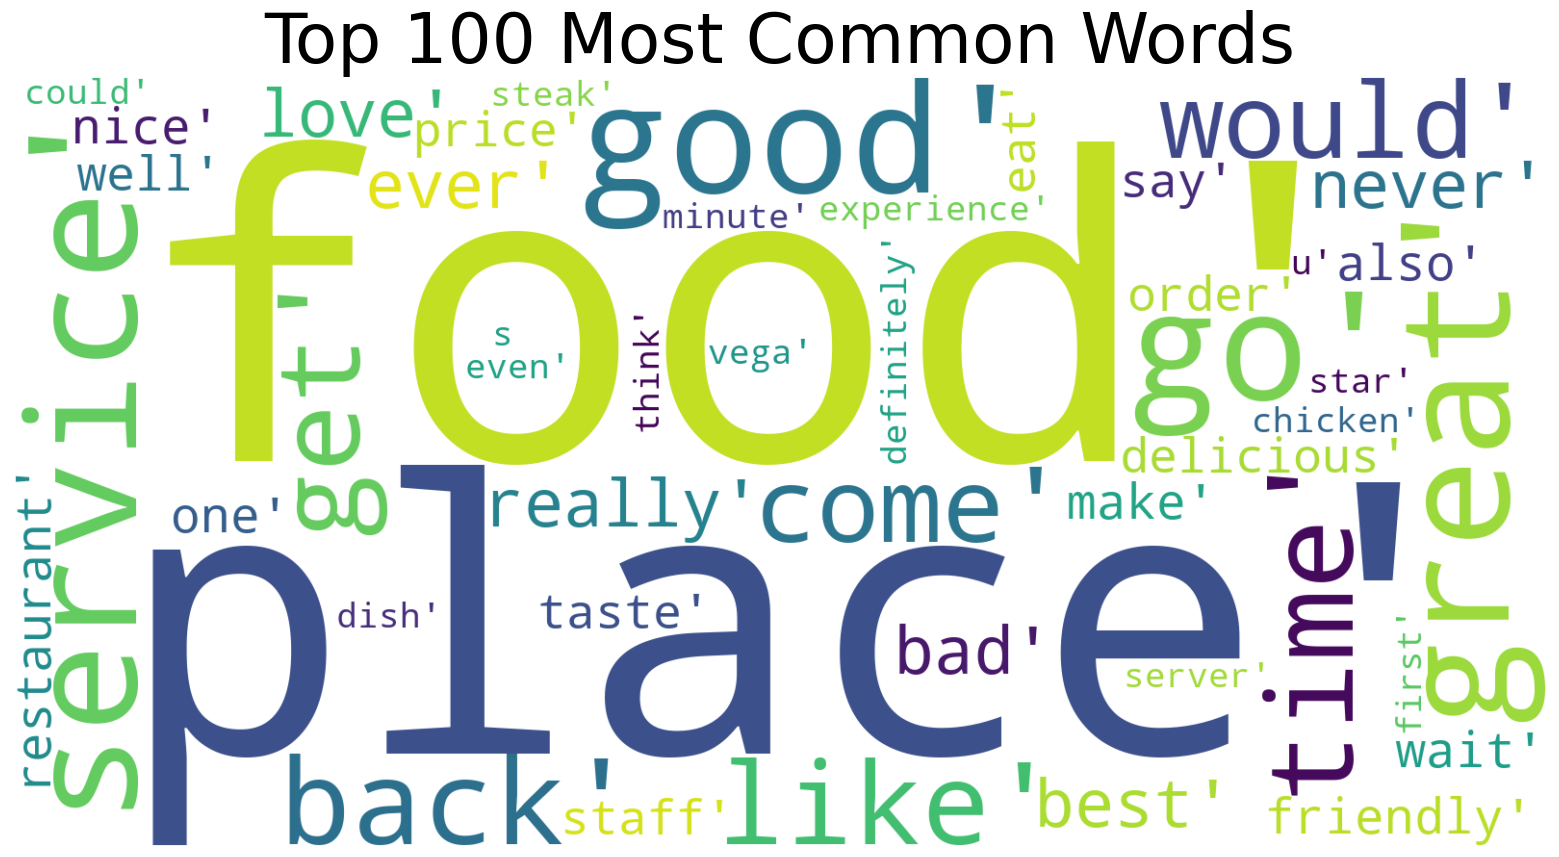

In [94]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.show()